In [16]:
from sklearn.cluster import KMeans
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline


In [17]:
df = pd.read_csv("income.csv")
df 

,Name,Age,Income
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,ismail,28,60000
4,Kory,42,150000
5,Gautam,39,150000
6,David,41,160000
7,Andrea,38,160000
8,Brad,36,156000
9,Angelina,35,130000


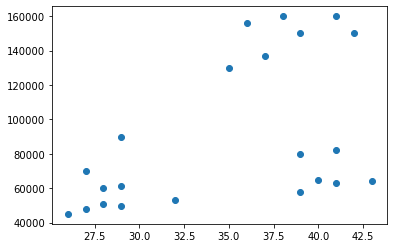

In [18]:
plt.scatter(df['Age'], df['Income'])

In [19]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [20]:
y_predicted = km.fit_predict(df[['Age', 'Income']])
y_predicted


array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2])

In [21]:
df['cluster'] = y_predicted
df.head()

,Name,Age,Income,cluster
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,2
3,ismail,28,60000,2
4,Kory,42,150000,1


No handles with labels found to put in legend.


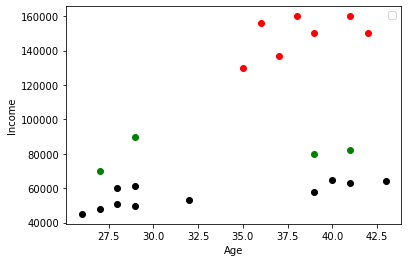

In [22]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.scatter(df1.Age,df1['Income'],color='green')
plt.scatter(df2.Age,df2['Income'],color='red')
plt.scatter(df3.Age,df3['Income'],color='black')

plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()


In [23]:
scaler = MinMaxScaler()
scaler.fit(df[['Income']])
df['Income'] = scaler.transform(df[['Income']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])
df

,Name,Age,Income,cluster
0,Rob,0.058824,0.217391,0
1,Michael,0.176471,0.391304,0
2,Mohan,0.176471,0.139130,2
3,ismail,0.117647,0.130435,2
4,Kory,0.941176,0.913043,1
5,Gautam,0.764706,0.913043,1
6,David,0.882353,1.000000,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.965217,1
9,Angelina,0.529412,0.739130,1


In [24]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age', 'Income']])
y_predicted

array([0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [25]:
df['cluster'] = y_predicted
df

,Name,Age,Income,cluster
0,Rob,0.058824,0.217391,0
1,Michael,0.176471,0.391304,0
2,Mohan,0.176471,0.139130,0
3,ismail,0.117647,0.130435,0
4,Kory,0.941176,0.913043,2
5,Gautam,0.764706,0.913043,2
6,David,0.882353,1.000000,2
7,Andrea,0.705882,1.000000,2
8,Brad,0.588235,0.965217,2
9,Angelina,0.529412,0.739130,2


In [26]:
km.cluster_centers_

array([[0.1372549 , 0.11835749],
       [0.85294118, 0.2057971 ],
       [0.72268908, 0.90434783]])

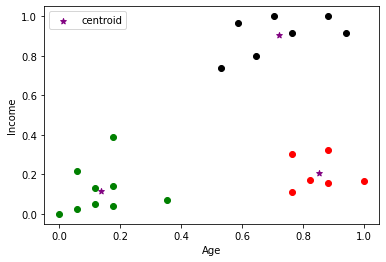

In [27]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.scatter(df1.Age,df1['Income'],color='green')
plt.scatter(df2.Age,df2['Income'],color='red')
plt.scatter(df3.Age,df3['Income'],color='black')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple', marker='*', label='centroid')

plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()   